In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from collections import defaultdict
import seaborn as sns
import func as f

%matplotlib inline

# Load Data

In [2]:
df_2018 = f.load_data('data/2018/survey_results_public.csv');
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [3]:
schema_2018 = f.load_data('data/2018/survey_results_schema.csv');
schema_2018.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree..."


# Data Exploration

#### Number of rows and columns in the dataset

In [4]:
rows_cols = df_2018.shape
print('This dataset has {} rows and {} columns'.format(rows_cols[0],rows_cols[1]))

This dataset has 98855 rows and 129 columns


#### Columns that have no missing values

In [5]:
no_nulls = set(df_2018.columns[df_2018.isnull().mean()==0])
print('Out of {} columns {} have no missing values:\n \t{}'.
      format(rows_cols[1],len(no_nulls),no_nulls))

Out of 129 columns 3 have no missing values:
 	{'Hobby', 'Respondent', 'OpenSource'}


#### Columns that have most missing values

In [6]:
most_missing_cols = set(df_2018.columns[df_2018.isnull().mean() > 0.75])
print('Out of {} columns {} have most missing values:\n \t{}'.
      format(rows_cols[1],len(most_missing_cols),most_missing_cols))

Out of 129 columns 2 have most missing values:
 	{'TimeAfterBootcamp', 'MilitaryUS'}


For anwering our business questions we may not require processing of these missing columns. Hence we may not drop/fill any missing values in the columns. 

#### How many countries are there in dataset

In [7]:
country_count = f.unique_vals(df_2018,'Country')
len(country_count)

183

# Business Questions:

### 1. How can we Assess a potential job opportunity

There are various parameters based on which we can decide on which job will be suitable for us. Lets take a look at the data and try to analyze what professionals have to say on this.

For detailed analysis please goto  How To Assess a Job.ipynb. Here we will 
show the results and conclusion

In [8]:
def que_assessjob(col):
    """
    This Functions looks for given col string in schema_2018 Column and returns the 
    last sentence in QuestionText column of the schema_2018 dataframe 
    
    INPUT
    col - string of the column name for which description is required
    
    Output
    que_text - last sentence of the description of the given column name
    """
    que_text = schema_2018[schema_2018.Column==col]['QuestionText'].astype(str).str.split('.').str.get(-1)
    return que_text

def assess_job(df_2018):
    """
    This Function creates a dataframe of AssessJob Question description and the highest 
    average rating given in Assessjob column of df_2018 dataframe
    
    INPUT
    df_2018 - dataframe to look for Assessjob column
    
    OUTPUT
    job_assess = Dataframe with Question and Ratings columns
    """
    que = []
    assess = []
    for i in range(1,11):
        # loop through assessjob columns to get their questions description
        que.append(que_assessjob('AssessJob{}'.format(i)).values[0])
        # calcluate value_counts for each AssessJob column
        assess.append((df_2018['AssessJob{}'.format(i)].value_counts()).keys()[0])
    # create dataframe with Question and Ratings column
    job_assess = pd.DataFrame({'Question':que,'Ratings':assess})
    job_assess.style.set_properties(subset=['Question'],**{'width': 10})
    job_assess = job_assess.sort_values(by='Ratings',ascending=True).reset_index(drop=True) # sort the values
    return job_assess
job_df = assess_job(df_2018)
print("Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the job opportunity in order of importance (by dragging the choices up and down), where 1 is the most important and 10 is the least important.")
job_df

Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the job opportunity in order of importance (by dragging the choices up and down), where 1 is the most important and 10 is the least important.


,Question,Ratings
0,"The languages, frameworks, and other technolo...",1.0
1,The compensation and benefits offered,1.0
2,Opportunities for professional development,1.0
3,The office environment or company culture,3.0
4,The specific department or team I'd be workin...,8.0
5,How widely used or impactful the product or s...,8.0
6,The industry that I'd be working in,9.0
7,The financial performance or funding status o...,9.0
8,The opportunity to work from home/remotely,10.0
9,The diversity of the company or organization,10.0


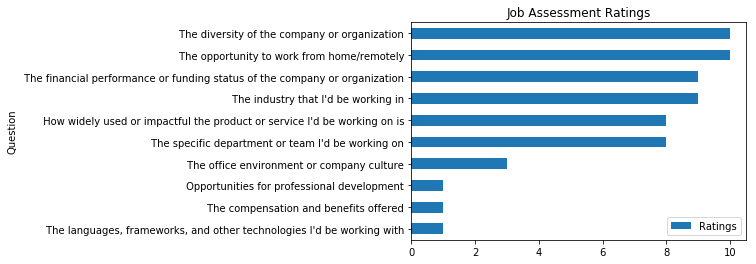

In [9]:
job_ratings = job_df.set_index('Question')
job_ratings.plot(kind='barh',title='Job Assessment Ratings');

From above table we can say that majority of professionals think the technologies are the most important thing a person should assess which evaluating a job followed by wages, personal growth and office culture. Its clear that majority thinks the domain which you will be working in or specific team or department where you will work doesn't keep a very high importance. This looks true as through out a professionals career, domains keep changing and departments are very specific to a company, what doesn't change are your skillset for which you will be hired for a potential job opportunity.

The languages, frameworks, and other technologies I'd be working with


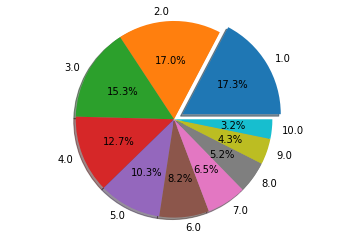

1: most important, 10: least important


In [10]:
print(que_assessjob('AssessJob4').values[0].strip())
f.piechart(df_2018,'AssessJob4')
print("1: most important, 10: least important")

A little more than 17 percent of professional in this group thinks Technology is the most important parameter

Hence we conclude that the most important factor in assessing any potential job opportunity will be the required Technology Skills. This brings us to our next question, what are the latest trending skills in terms of language, database, framework etc.

### 2. What skills to acquire?

Here we will try to answer our second question: what skills to acquire in terms of what are the most popular technologies like Language, Database, Framework

#### Most Popular Language

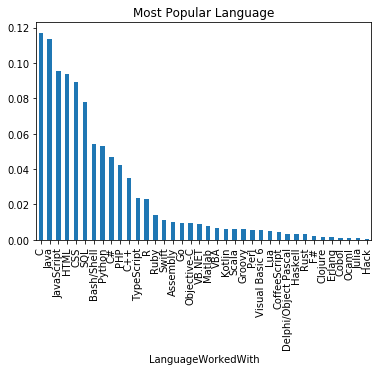

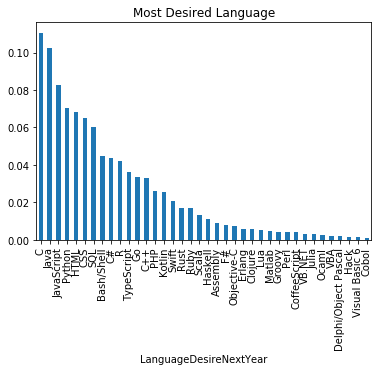

In [11]:
pos_lang_vals = f.unique_vals(df_2018,'LanguageWorkedWith')
most_popular_lang = f.clean_and_plot(df_2018,'LanguageWorkedWith',pos_lang_vals,'Most Popular Language',True)
most_desired_lang = f.clean_and_plot(df_2018,'LanguageDesireNextYear',pos_lang_vals,'Most Desired Language',True)

As can be seen from above 2 plots that C language along with Java is not only the most popular language but it is also the most desired language next year

#### Most Popular Database

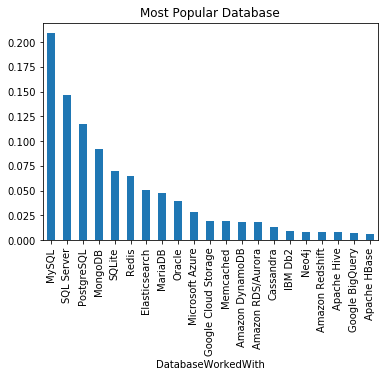

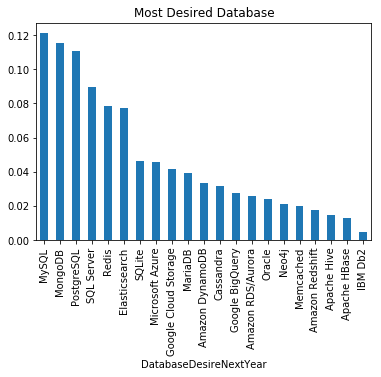

In [12]:
pos_db_vals = f.unique_vals(df_2018,'DatabaseWorkedWith')

most_popular_database = f.clean_and_plot(df_2018,'DatabaseWorkedWith',pos_db_vals,'Most Popular Database',True)
most_desired_database = f.clean_and_plot(df_2018,'DatabaseDesireNextYear',pos_db_vals,'Most Desired Database',True)

It can be seen from above plot that MySQL and SQL Server are the most popular Database.

#### Most Popular Framework

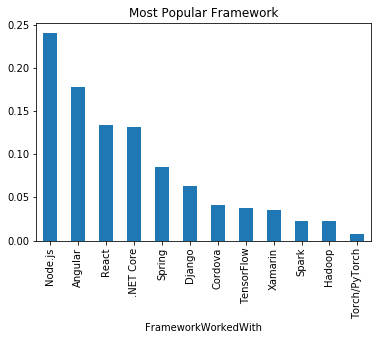

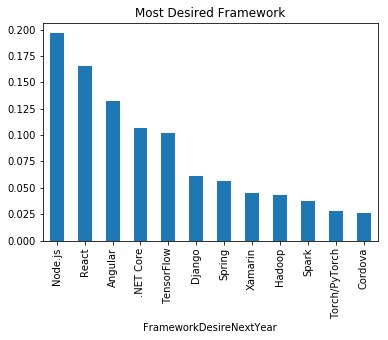

In [13]:
pos_db_vals = f.unique_vals(df_2018,'FrameworkWorkedWith')
most_popular_framework = f.clean_and_plot(df_2018,'FrameworkWorkedWith',pos_db_vals,'Most Popular Framework',True)
most_desired_framework = f.clean_and_plot(df_2018,'FrameworkDesireNextYear',pos_db_vals,'Most Desired Framework',True)

It can be seen from above plot that Node.js and Angular are the 2 most popular Framework.

## Conclusion:
    The Most popular Technologies are:
    Language: C and Java
    Database: MySQL and SQL Server
    Framework: Node.js and Angular

### 3. Where to acquire these skills?

Our last question would be to where/how to acquire these skills. For answering this question we will look into the column, EducationTypes

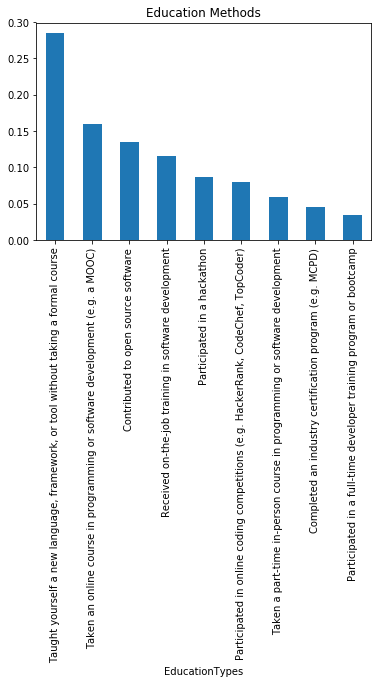

In [14]:
pos_ed_vals = f.unique_vals(df_2018,'EducationTypes')
ed_methods = f.clean_and_plot(df_2018,'EducationTypes',pos_ed_vals,'Education Methods',True)

From above plot it is clear that majority of professionals think self study is the best option of Education. In our case, people are not from industry or have technology skills in fact they want to acquire one. So for us the best way would be to go with second option which is taking an online course.

# Conclusion:
    The most popular method of acquiring new skills is to take an online course on programming or software development(eg. a MOOC)